In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Quadrature

**Goal:** Evaluate integrals

$$ \int^b_a f(x) dx$$

 - Many integrals do not have closed form solutions
 
   $$ \int^b_a \sqrt{1 + \cos^2 x} dx$$

 - Solution to ordinary differential equations
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Defining $v = \frac{\text{d} u}{\text{d}t}$ then leads to

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   which can be solved by integration
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  
   
 - Solving partial differential equations

## Riemann Sums

Given $f(x)$ and a partition of the interval $[a,b]$ with $\{x_i\}^N_{i=0}$ and $a = x_0 < x_1 < \ldots < x_N = b$ and $x^*_i \in [x_i, x_{i+1}]$ we define the Riemann integral as

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

This is a general definition and leads to a number of quadrature approaches based on how we pick $x_i^* \in [x_i, x_{i+1}]$.

### Midpoint Rule

Choose $x_i^*$ such that

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

so that

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = Q_m[f]$$

over $\Delta x_i = x_{i+1} - x_i$ 

$$Q_m[f] = \Delta x f\left(\frac{\Delta x}{2} \right )$$

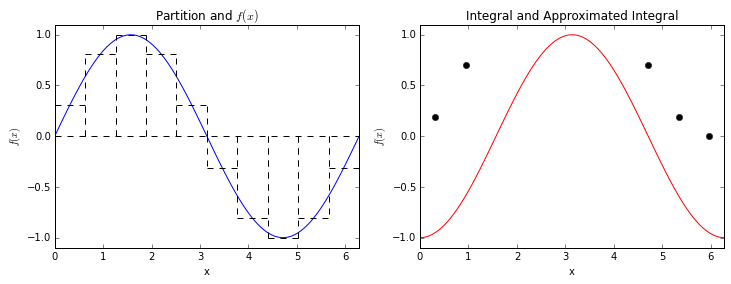

In [53]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: -numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_star.shape)
Qf[0] = f(x_star[0]) * delta_x
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
axes.plot(x_star, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

plt.show()
    


## Quadrature

A method to evaluate $I[f]$ using a discrete, finite number of function evaluations:

$$Q[f] = \sum^M_{i=0} w_i f(x_i)$$

where $w_i$ are weights.  A particular quadrature method will specify the weights $w_i$ and the points $x_i$ to evaluate the function $f(x)$ at.

### Error Analysis

Define the error $E[f]$ such that

$$I[f] = Q[f] + E[f]$$

The degree of $Q[f]$ is the integer $n$ such that $E[p_i] = 0 \forall i \leq n$ and $\exists p_{n+1}$ such that $E[p_{n+1}] \neq 0$.

### Newton-Cotes Quadrature

Using $N+1$ equally spaced points, evaluate $f(x)$ at these points and exactly integrate the interpolating polynomial exactly.

$$Q[f] = \int^b_a P_N(x) dx$$

### Trapezoidal Rule

$N = 1$

### Simpson's Rule

$N=2$

In [52]:
# Show interpolating polynomial and integral